<a href="https://colab.research.google.com/github/han-juyoung/Aimers_Lectures/blob/main/Deep_Learning_%EA%B8%B0%EC%9A%B8%EA%B8%B0_%EC%86%8C%EC%8B%A4_%EB%AC%B8%EC%A0%9C(Vanishing_Gradient)_%ED%99%95%EC%9D%B8%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

import logging, os
logging.disable(logging.WARNING)
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

'''
1. 활성화 함수는 출력층만 그대로 두고
   나머지 히든층들은 `relu`로 설정하세요.
'''

def make_model_relu():

    model_relu = tf.keras.models.Sequential([
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
    ])

    return model_relu

'''
2. 활성화 함수는 출력층만 그대로 두고
   나머지 히든층들은 `sigmoid`로 설정하세요.
'''

def make_model_sig():

    model_sig = tf.keras.models.Sequential([
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        tf.keras.layers.Dense(64, activation='sigmoid'),
        tf.keras.layers.Dense(64, activation='sigmoid'),
        tf.keras.layers.Dense(64, activation='sigmoid'),
        tf.keras.layers.Dense(64, activation='sigmoid'),
        tf.keras.layers.Dense(64, activation='sigmoid'),
        tf.keras.layers.Dense(64, activation='sigmoid'),
        tf.keras.layers.Dense(32, activation='sigmoid'),
        tf.keras.layers.Dense(32, activation='sigmoid'),
        tf.keras.layers.Dense(32, activation='sigmoid'),
        tf.keras.layers.Dense(32, activation='sigmoid'),
        tf.keras.layers.Dense(10, activation='softmax')
    ])

    return model_sig

'''
3. 두 모델을 불러온 후 학습시키고 테스트 데이터에 대해 평가합니다.

   Step01. model_relu와 model_sig 불러옵니다.

   Step02. 두 모델의 최적화 방법과 손실 함수를
           똑같이 설정합니다.

   Step03. 두 모델의 구조를 확인하는 코드를 작성합니다.
           우리가 만든 모델이 얼마나 깊은지 확인해보세요.

   Step04. 두 모델을 학습시킵니다.
           'epochs'는 5로 설정합니다.
           검증용 데이터는 설정하지 않습니다.
           'verbose'는 0으로 설정합니다.

   Step05. 두 모델을 테스트하고 점수를 출력합니다.
           둘 중 어느 모델의 성능이 더 좋은지 확인해보세요.
'''

def main():

    # MNIST 데이터를 불러오고 전처리합니다.
    mnist = tf.keras.datasets.mnist
    (x_train, y_train), (x_test, y_test) = mnist.load_data()
    x_train, x_test = x_train / 255.0, x_test / 255.0

    model_relu = make_model_relu()  # 히든층들의 활성화 함수로 relu를 쓰는 모델입니다.
    model_sig = make_model_sig()   # 히든층들의 활성화 함수로 sigmoid를 쓰는 모델입니다.
    # 'sparse_categorical_crossentropy' 사용하는 이유 label이 0~9의 정수라서
    # label이 one-hot 벡터 형태로 정의되어 있으면 'categorical_crossentropy' 를 사용하면 됨
    model_relu.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model_sig.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    model_relu.summary()
    model_sig.summary()

    model_relu_history = model_relu.fit(x_train, y_train, epochs=5, batch_size=500, verbose=0)
    print('\n')
    model_sig_history = model_sig.fit(x_train, y_train, epochs=5, batch_size=500, verbose=0)

    scores_relu = model_relu.evaluate(x_test, y_test, verbose=0)
    scores_sig = model_sig.evaluate(x_test, y_test, verbose=0)

    print('\naccuracy_relu: ', scores_relu[-1])
    print('accuracy_sig: ', scores_sig[-1])

    return model_relu_history, model_sig_history

if __name__ == "__main__":
    main()

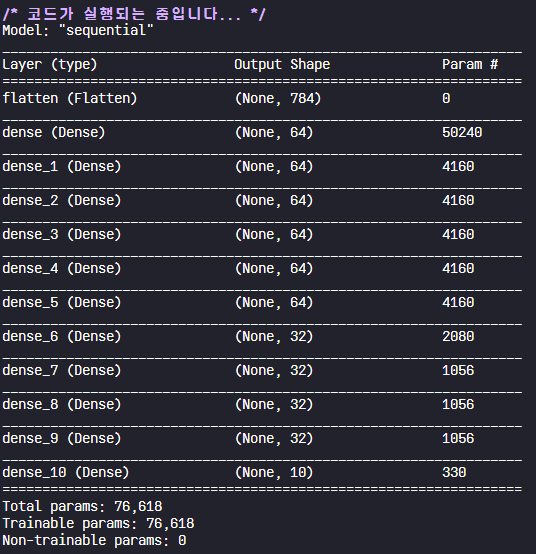

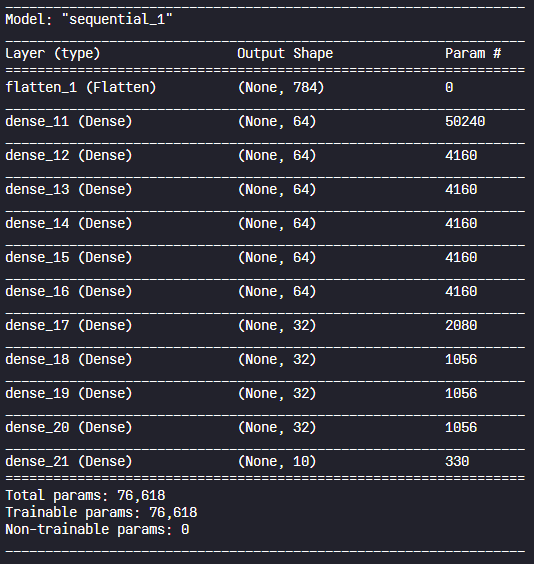

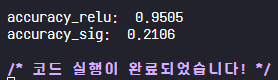

relu 사용시 학습이 잘 되지만, sigmoid 사용시 학습이 잘 안된 것을 볼 수 있다.
이유는, sigmoid를 사용하는데 hidden layer 가 많아지면 학습하는 과정에서 gradient가 손실되어 학습이 잘 안된다.